# FANDANGOGATE

Looks like our data-analyst friend Walt Hickey (crickey what a last name) has found out that the online movie ratings aggregator might be inflating the ratings of movies in their webstie. Could this be true? Let's find out together!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in original data from Walt Hickey and data from 2016 and 2017 collected by DQ 
hickey_data = pd.read_csv('fandango_score_comparison.csv')
dq_data = pd.read_csv('movie_ratings_16_17.csv')

# Display all rows and columns for pandas series and dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Select relevant data from dataframes
hickey_df = hickey_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
dq_df = dq_data[['movie', 'year', 'fandango']]
print(hickey_df, dq_df)

                                                  FILM  Fandango_Stars  \
0                       Avengers: Age of Ultron (2015)             5.0   
1                                    Cinderella (2015)             5.0   
2                                       Ant-Man (2015)             5.0   
3                               Do You Believe? (2015)             5.0   
4                        Hot Tub Time Machine 2 (2015)             3.5   
5                             The Water Diviner (2015)             4.5   
6                                Irrational Man (2015)             4.0   
7                                      Top Five (2014)             4.0   
8                         Shaun the Sheep Movie (2015)             4.5   
9                                  Love & Mercy (2015)             4.5   
10                   Far From The Madding Crowd (2015)             4.5   
11                                    Black Sea (2015)             4.0   
12                                    

As per the *README.md* in *fivethirtyeight*'s Github, the movies selected by Hickey for his analysis were those that '[...] has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango.' 

On the other hand, the data collected in *movie_ratings_16_17.csv* was '[...] data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017.'

Neither of these selection methods was random and therefore the results obtained would probably not be representative of the whole population. 

*Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.*



### Are the datasets statistically significant?

Ideally one would have only popular movies in the dataset; that is, movies that have been reviewd a statistically signifcant number of times. This number is somewhat arbitrary and is set depending on the conditions of the project or analysis. In this case we will consider 30 reviews or more to be statistically significant. 

One of the datasets does provide us with the number of reviews, but the other does not. In the *READ.md* section of the Github repository it is stated that only popular movies were selected. However, we would like to make sure that this is the case. In order to do so, one could select a few movies at random from the dataset and check on the Fandango webpage how many reviews it has. 

In [3]:
# We take a random sample, sample state has been chosen as the same one as in the solutions so the n# of ratings is the same
dq_df.sample(10, random_state = 1)


,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


The number of reviews for the movies above is presented here.

| Movie | Number of Ratings |
| :- | -: |
| Mechanic: Resurrection | 2247 |
| Warcraft | 7271 |
| Max Steel	 | 493 |
| Me Before You	 | 5263 |
| Fantastic Beasts and Where to Find Them | 13400 |
| Cell | 17 |
| Genius | 127 |
| Sully | 11877 |
| A Hologram for the King | 500 |
| Captain America: Civil War | 35057 |

Only 1 of the movies has less reviews than the threshold of 30; it is safe to asume that the vast majority of movies in the database are popular.



### Years of interest

If one browses through the population, it is obvious that some of the movies were not released in the years of interest, that is, 2015 and 2016. We need therefore to weed out these sample points. The newer data sample does provide us with a column for the year. However, Hickey's sample does not; it does provide us the year in the *FILM* column though. As it is always provided at the end of the string and using the same number of characters it should be easy to isolate the year and fill a new column with them. 

In [12]:
# Fill new 'Year' column in Hickey's data sample
hickey_df['Year'] = hickey_df['FILM'].str[-5:-1]

# Print the number of unique values for the 'Year' column
print(hickey_df.Year.value_counts())


2015    129
2014     17
Name: FILM, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [18]:
# Create new dataframe only with movies from 2015
hickey_2015 = hickey_df[hickey_df.Year == '2015'].copy()

# Print the number of unique values for the 'Year' column to make sure only 2015 movies are left
print(hickey_2015.Year.value_counts())


2015    129
Name: Year, dtype: int64


We will now do the same for the new data set. In this case we only want movies from 2016.

In [19]:
dq_2016 = dq_df[dq_df.year == 2016].copy()
print(dq_2016.year.value_counts())

2016    191
Name: year, dtype: int64


In [22]:
print(hickey_2015.head(2), '\n',  dq_2016.head(2))

                             FILM  Fandango_Stars  Fandango_Ratingvalue  \
0  Avengers: Age of Ultron (2015)             5.0                   4.5   
1               Cinderella (2015)             5.0                   4.5   

   Fandango_votes  Fandango_Difference  Year  
0           14846                  0.5  2015  
1           12640                  0.5  2015   
                  movie  year  fandango
0  10 Cloverfield Lane  2016       3.5
1             13 Hours  2016       4.5


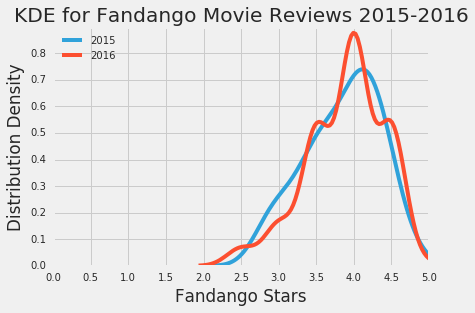

In [45]:
%matplotlib inline
plt.style.use('fivethirtyeight')


sns.kdeplot(data=hickey_2015.Fandango_Stars, legend=True, label='2015')
sns.kdeplot(data=dq_2016.fandango, legend=True, label='2016')
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.yticks(np.arange(0,0.9,0.1))
plt.xlim(0,5)
plt.legend(loc='upper left')
plt.title('KDE for Fandango Movie Reviews 2015-2016')
plt.xlabel('Fandango Stars')
plt.ylabel('Distribution Density')
plt.show()

yada yada yada

### Frequency distribution tables

In order to deep deeper into the distribution density of the two samples the frequency distribution tables will now be computed. With the information that we can derive from those we'd like to answer the following two questions:

- Is it still clear that there is a difference between the two distributions?
- What can one tell about the direction of the difference just from the tables? Is the direction still that clear anymore?

In [55]:
# Freq. distribution table for original dataset, sorted by number of stars and normalized
hickey_2015.Fandango_Stars.value_counts(normalize=True).sort_index()*100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [57]:
# Freq. distribution table for new dataset, sorted by number of stars and normalized
dq_2016.fandango.value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

yada yada 

In [60]:
distribution_2015 = hickey_2015.Fandango_Stars.value_counts(normalize=True).sort_index()*100
distribution_2016 = dq_2016.fandango.value_counts(normalize=True).sort_index()*100

distribution_2016.describe()

count     6.000000
mean     16.666667
std      15.543361
min       0.523560
25%       4.188482
50%      15.706806
75%      24.476440
max      40.314136
Name: fandango, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



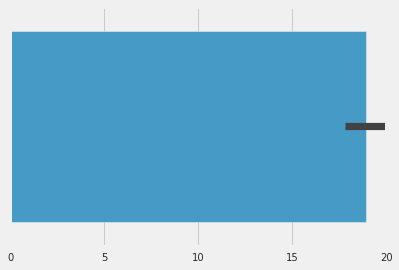

0     6.976744
1     8.527132
2    17.829457
3    28.682171
4    37.984496
dtype: float64


In [66]:
mean_2015 = distribution_2015.mean()
median_2015 = distribution_2015.median()
mode_2015 = distribution_2015.mode()
statistics_2015 = [mean_2015, median_2015]

mean_2016 = distribution_2016.mean()
median_2016 = distribution_2016.median()
mode_2016 = distribution_2016.mode()

sns.barplot()
plt.show()
print(mode_2015)